# Тематическое моделирование ДЗ

In [1]:
import pandas as pd

import nltk
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/bbaron/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bbaron/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bbaron/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bbaron/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Загрузка и предобработка данных

In [3]:
# from pymystem3 import Mystem # Для русских слов!
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import re
 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

regex = re.compile(r'\b\w+\b')


def words_only(text, regex=regex):
    try:
        text = regex.findall(text.lower())
        filtered_words = [word for word in text if word not in stop_words]
        return " ".join(filtered_words)
    except:
        return ""


def lemmatize(text):
    try:
        words = word_tokenize(text)
        return " ".join([(lemmatizer.lemmatize(word)) for word in words])
    except:
        return " "


In [4]:
main_df = pd.read_csv("IMDB Dataset.csv")
main_df['sentiment'] = main_df['sentiment'].map({"positive": 1, "negative": 0})

main_df.review[135]

'This film could have been a decent re-make, and gosh knows it tried (or Ms. English tried). Assembling talented actors together with a successful & experienced writer/director should be a formula for a decent film. But Ms. English\'s experience - according to her IMDb bio - is exclusively limited to television work, and it is glaringly obvious throughout this film.<br /><br />I am surprised that none of the reviews I have read mention what I found most unlikeable about this film, and what kept it from reaching even a portion of its potential: it looked and felt like it was made for television. To give some credit to Ms. English, many of the jokes that simply did NOT work on a movie screen would have been terrific on TV (and maybe a laugh track would have helped). So much of the camera usage and the lighting would have played out fine on TV but looked awkward or odd on a big screen. If the whole film had been chopped up into a mini-series or a sit-com, I think it could have worked. But

In [5]:
%time main_df.review = main_df.review.apply(words_only)
%time main_df.review = main_df.review.apply(lemmatize)

main_df.review[135]

CPU times: user 3.3 s, sys: 17.2 ms, total: 3.31 s
Wall time: 3.31 s
CPU times: user 30.9 s, sys: 56.6 ms, total: 31 s
Wall time: 31 s


'film could decent make gosh know tried m english tried assembling talented actor together successful experienced writer director formula decent film m english experience according imdb bio exclusively limited television work glaringly obvious throughout film br br surprised none review read mention found unlikeable film kept reaching even portion potential looked felt like made television give credit m english many joke simply work movie screen would terrific tv maybe laugh track would helped much camera usage lighting would played fine tv looked awkward odd big screen whole film chopped mini series sit com think could worked cinema sadly m english talent translate cringed many different point embarrassment actor writer felt like came theater half shriveled meg ryan usual perky cute self except awful plastic surgery face chance use talent made film recreate stereo typed role done well annette bening seemed simply go motion great talent yet poor performance enjoyed woman character cari

In [6]:
main_df["Preprocessed_text"] = main_df.apply(lambda row: row['review'].split(), axis=1)

main_df.head()

,review,sentiment,Preprocessed_text
0,one reviewer mentioned watching 1 oz episode h...,1,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake think zombie ...,0,"[basically, family, little, boy, jake, think, ..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ..."


### Мешок слов

In [7]:
from collections import Counter

words = Counter()

for text in main_df["Preprocessed_text"]:
    words.update(text)
    
del words["/"]
del words["br"]

words.most_common(10)

[('movie', 103280),
 ('film', 93460),
 ('one', 55450),
 ('like', 41132),
 ('time', 31469),
 ('good', 29868),
 ('character', 28361),
 ('story', 25274),
 ('even', 24872),
 ('get', 24657)]

In [8]:
max_words = 10000

word_to_idx = {}
idx_to_word = {}

for i, word in enumerate(words.most_common(max_words - 2)):
    word_to_idx[word[0]] = i + 2
    idx_to_word[i + 2] = word[0]

print(list(word_to_idx.items())[:5])
print(list(idx_to_word.items())[:5])

[('movie', 2), ('film', 3), ('one', 4), ('like', 5), ('time', 6)]
[(2, 'movie'), (3, 'film'), (4, 'one'), (5, 'like'), (6, 'time')]


In [9]:
def text_to_seq(text, word_to_idx):
    seq = []
    for w in text:
        curr_word_idx = word_to_idx.get(w, 1)
        if curr_word_idx != 1:
            seq.append(curr_word_idx)
    return seq

In [10]:
main_df["Sequence"] = main_df["Preprocessed_text"].apply(lambda row: text_to_seq(row, word_to_idx))

main_df.head()

,review,sentiment,Preprocessed_text,Sequence
0,one reviewer mentioned watching 1 oz episode h...,1,"[one, reviewer, mentioned, watching, 1, oz, ep...","[4, 1051, 937, 65, 202, 2857, 171, 2952, 103, ..."
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin...","[290, 47, 227, 1240, 1593, 69, 6, 2080, 1304, ..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su...","[89, 290, 25, 1022, 6, 741, 1297, 2300, 1095, ..."
3,basically family little boy jake think zombie ...,0,"[basically, family, little, boy, jake, think, ...","[566, 116, 47, 185, 3093, 30, 499, 3607, 557, ..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ...","[9632, 34, 6, 188, 1949, 1278, 3, 33, 271, 963..."


In [11]:
def seq_to_vec(sequences, n_words=10000):
    vector = np.zeros((len(sequences), n_words))
    for i, seq in enumerate(sequences):
        for index in seq:
            vector[i, index] += 1

    return vector

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

random_state = 42

X_seq = main_df['Sequence']
X = seq_to_vec(X_seq)

Y = main_df['sentiment']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=random_state)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

l_r_model = LogisticRegression(max_iter=50000)

%time l_r_model.fit(X_train, Y_train)

print("accuracy =", l_r_model.score(X_valid, Y_valid))

Y_pred = l_r_model.predict(X_valid)

classification_rep = classification_report(Y_valid, Y_pred)
print(classification_rep)

CPU times: user 4min 37s, sys: 24.6 s, total: 5min 2s
Wall time: 1min
accuracy = 0.8748
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### Tf-Idf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.85,
    norm=None
)

X_idf = main_df["review"]
Y = main_df['sentiment']

X_train_idf, X_valid_idf, Y_train_idf, Y_valid_idf = train_test_split(X_idf, Y, test_size=0.2, random_state=random_state)

X_train_idf = tfidf_vectorizer.fit_transform(X_train_idf)
X_valid_idf = tfidf_vectorizer.transform(X_valid_idf)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

l_r_model = LogisticRegression(max_iter=50000)

%time l_r_model.fit(X_train_idf, Y_train_idf)

print("accuracy =", l_r_model.score(X_valid_idf, Y_valid_idf))

Y_pred = l_r_model.predict(X_valid_idf)

classification_rep = classification_report(Y_valid_idf, Y_pred)
print(classification_rep)

CPU times: user 20.8 s, sys: 1.91 s, total: 22.7 s
Wall time: 5.09 s
accuracy = 0.9059
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4961
           1       0.90      0.91      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Word2Vec

In [43]:
from gensim.models import Word2Vec

texts = list(main_df["Preprocessed_text"])

%time w2v_model = Word2Vec(texts, vector_size=100, window=5, workers=4)
# w2v_model.save('w2v.model')

CPU times: user 55.9 s, sys: 286 ms, total: 56.2 s
Wall time: 15.1 s


### Визуализация слов с помощью TSNE

In [44]:
from nltk import FreqDist

top_words = []

fd = FreqDist()

for text in texts:
    fd.update(text)
for i in fd.most_common(500):
    top_words.append(i[0])
    
top_words_vec = w2v_model.wv[top_words]
top_words_vec.shape

(500, 100)

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [46]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=12, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

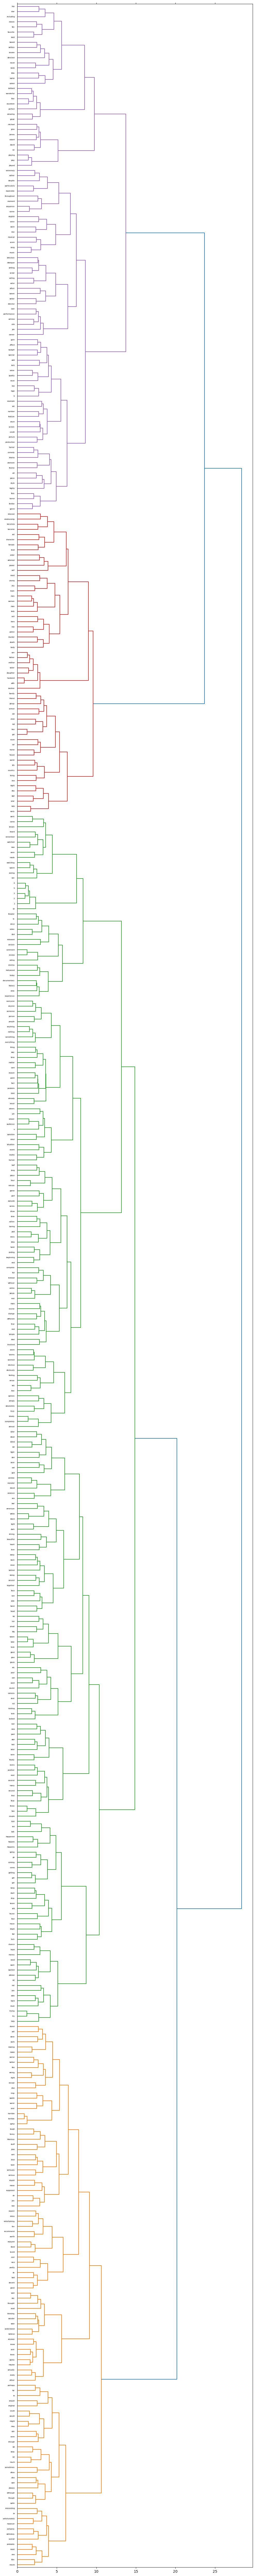

In [48]:
from scipy.cluster.hierarchy import  ward, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

# plt.savefig('w2v_cluster.png', dpi=200) #save figure as ward_clusters

In [78]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words.split() if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [79]:
main_df.head()

,review,sentiment,Preprocessed_text,Sequence,TF_IDF_Preprocessed_text
0,one reviewer mentioned watching 1 oz episode h...,1,"[one, reviewer, mentioned, watching, 1, oz, ep...","[4, 1051, 937, 65, 202, 2857, 171, 2952, 103, ...",one reviewer mentioned watching 1 oz episode h...
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin...","[290, 47, 227, 1240, 1593, 69, 6, 2080, 1304, ...",wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su...","[89, 290, 25, 1022, 6, 741, 1297, 2300, 1095, ...",thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...,0,"[basically, family, little, boy, jake, think, ...","[566, 116, 47, 185, 3093, 30, 499, 3607, 557, ...",basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ...","[9632, 34, 6, 188, 1949, 1278, 3, 33, 271, 963...",petter mattei love time money visually stunnin...


In [80]:
X = list(main_df["review"])
Y = list(main_df["sentiment"])

X, Y = np.array(X), np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = random_state)

In [81]:
w2v = dict(zip(w2v_model.wv.index_to_key, w2v_model.wv.vectors))

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier())])
rfc_w2v.fit(X_train, Y_train)
pred = rfc_w2v.predict(X_test)

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Precision: {0:6.2f}".format(precision_score(Y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(Y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(Y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, pred)))
print(classification_report(Y_test, pred))
labels = rfc_w2v.classes_

Precision:   0.82
Recall:   0.82
F1-measure:   0.82
Accuracy:   0.82
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4961
           1       0.83      0.81      0.82      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [84]:
%%time

mev = MeanEmbeddingVectorizer(w2v)
X_train_w2v = mev.transform(X_train)
X_test_w2v = mev.transform(X_test)

CPU times: user 5.08 s, sys: 8.02 ms, total: 5.08 s
Wall time: 5.08 s


In [85]:
w2v_l_r_model = LogisticRegression(max_iter=50000)

%time w2v_l_r_model.fit(X_train_w2v, Y_train)

print("accuracy =", w2v_l_r_model.score(X_test_w2v, Y_test))

Y_pred = w2v_l_r_model.predict(X_test_w2v)

classification_rep = classification_report(Y_pred, Y_test)
print(classification_rep)

CPU times: user 420 ms, sys: 5.97 ms, total: 426 ms
Wall time: 424 ms
accuracy = 0.865
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4899
           1       0.87      0.86      0.87      5101

    accuracy                           0.86     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.87      0.86      0.87     10000



# Word2Vec с весами Tf-Idf 

In [91]:
from collections import Counter, defaultdict


class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words.split() if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [92]:
rfc_w2v = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier())])

In [93]:
rfc_w2v.fit(X_train,Y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.2f}".format(precision_score(Y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(Y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(Y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, pred)))
print(classification_report(Y_test, pred))

Precision:   0.84
Recall:   0.84
F1-measure:   0.84
Accuracy:   0.84
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

